# Pymaceuticals Inc.
---

### Analysis
- The weight of the mouse correlates to the size of tumor, independently of the treatment received, it'd be recommeded to control the weight of the mice in future research
- Ramicane and Capomulin seem to be the more promising drugs, with the smaller tumor volume sizes at the end of the measurement periods, they also have the most Mouse/timepoints measured which could have an impact of the final data.
- The treatments Stelasyn, Ketapril and Naftisol had worse results that the Placebo drug.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
# Display the data table for preview

combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined["Mouse ID"].nunique()



249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

combined["Duplicated"] = combined.duplicated(subset=['Mouse ID','Timepoint'],keep=False)


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicatesonly = combined.loc[combined['Duplicated'] == True,:]

print(duplicatesonly["Mouse ID"].unique())

print(duplicatesonly)


['g989']
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  Duplicated  
908           45.000000                 0        True  
909           45.000000                 0        True  
910           48.786801       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleanresults = combined.loc[combined['Mouse ID'] != 'g989',:].drop(columns=['Duplicated'])

cleanresults


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleanresults["Mouse ID"].nunique()




248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
def sem(data):
    sem_value = data.sem()
    return sem_value

summary = cleanresults.groupby(['Drug Regimen'],as_index = True).agg({'Tumor Volume (mm3)':['mean','median','std','var',sem]})

grouped_df = pd.DataFrame(summary)

grouped_df




Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

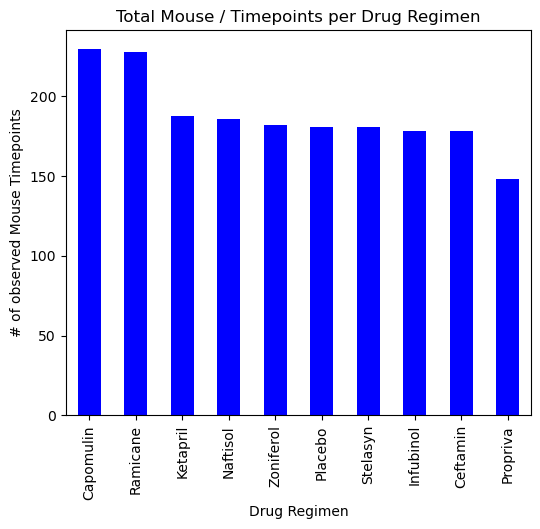

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

MouseTimes = cleanresults["Drug Regimen"].value_counts()

FirstBarChart = MouseTimes.plot(kind="bar", facecolor="blue", figsize=(6,5),
                                title="Total Mouse / Timepoints per Drug Regimen",
                                xlabel="Drug Regimen",ylabel="# of observed Mouse Timepoints")


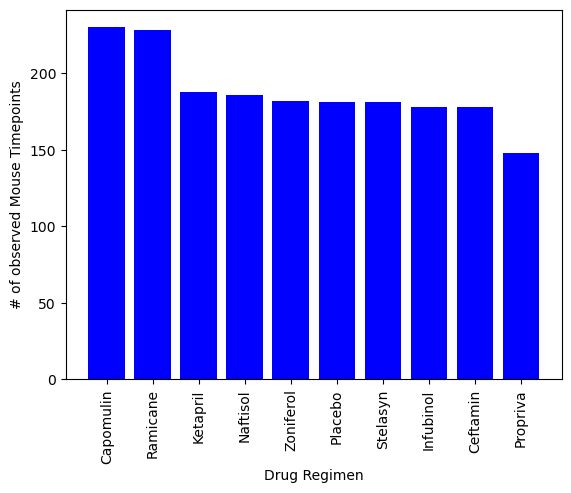

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts= cleanresults["Drug Regimen"].value_counts()

x_axis= drug_counts.index
y_axis = drug_counts.values

plt.bar(x_axis,y_axis,color="blue")

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()


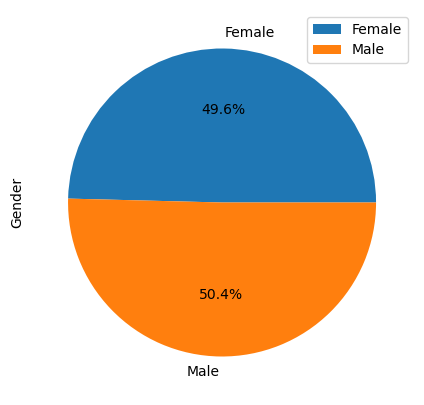

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

micegender = cleanresults.groupby(cleanresults["Sex"]).agg({"Mouse ID":['nunique']})

# Make the pie chart
pieplot = micegender.plot(kind="pie",ylabel='Gender', figsize=(5, 5), autopct='%1.1f%%', subplots=True)

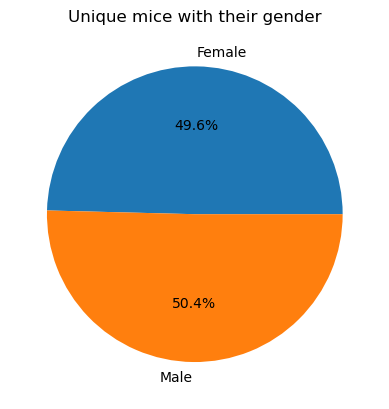

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender)
micegender = cleanresults.groupby(cleanresults["Sex"]).agg(uniquemice=("Mouse ID",'nunique'))

micegender_df = pd.DataFrame(micegender)

# Make the pie chart

plt.pie(micegender["uniquemice"], labels = ['Female','Male'],autopct='%1.1f%%')
plt.title("Unique mice with their gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

cleanresults['MaxTimepoint'] = cleanresults.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].transform('max')

# Filter the DataFrame to keep only the rows with the greatest timepoint for each mouse within each drug regimen
greatesttimes_results = cleanresults[cleanresults['Timepoint'] == cleanresults['MaxTimepoint']].sort_values(by='Mouse ID')

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# # Drop the additional column used for filtering
greatesttimes_results.drop(columns=["MaxTimepoint"],inplace = True)
cleanresults.drop(columns=["MaxTimepoint"],inplace = True)

tumor_last_time = pd.DataFrame(pd.merge(greatesttimes_results,cleanresults, on =['Timepoint', 'Mouse ID'], how="inner",)).sort_values(by="Tumor Volume (mm3)_x")

tumor_last_time.drop(columns=['Sex_y', 'Age_months_y', 'Weight (g)_y','Tumor Volume (mm3)_y', 'Metastatic Sites_y', 'Drug Regimen_y'], inplace=True)

tumor_last_time


,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x
96,k403,Ramicane,Male,21,16,45,22.050126,1
174,s185,Capomulin,Female,3,17,45,23.343598,1
121,m601,Capomulin,Male,22,17,45,28.430964,1
226,x401,Capomulin,Female,16,15,45,28.484033,0
70,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
186,t724,Naftisol,Female,2,25,45,75.113288,2
117,m269,Stelasyn,Female,22,28,45,75.123690,1
147,p189,Ketapril,Male,8,28,45,75.294936,4
112,l725,Naftisol,Female,8,26,45,76.668817,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
promisingtreatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
    
tumor_volumes = []

In [16]:
for treatment in promisingtreatments:
    treatment_data = tumor_last_time.loc[tumor_last_time['Drug Regimen_x'] == treatment]
    tumor_volumes.append(treatment_data['Tumor Volume (mm3)_x'])
    print(f"content of tumor_volumes: {tumor_volumes}")

content of tumor_volumes: [174    23.343598
121    28.430964
226    28.484033
61     30.485985
192    31.023923
239    31.896238
163    32.377357
124    33.329098
183    34.455298
220    36.041047
64     37.074024
83     37.311846
85     38.125164
87     38.753265
115    38.846876
24     38.939633
19     38.982878
208    39.952347
66     40.159220
204    40.658124
180    40.728578
108    41.483008
169    41.581521
162    46.539206
80     47.685963
Name: Tumor Volume (mm3)_x, dtype: float64]
content of tumor_volumes: [174    23.343598
121    28.430964
226    28.484033
61     30.485985
192    31.023923
239    31.896238
163    32.377357
124    33.329098
183    34.455298
220    36.041047
64     37.074024
83     37.311846
85     38.125164
87     38.753265
115    38.846876
24     38.939633
19     38.982878
208    39.952347
66     40.159220
204    40.658124
180    40.728578
108    41.483008
169    41.581521
162    46.539206
80     47.685963
Name: Tumor Volume (mm3)_x, dtype: float64, 96     2

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers

for i, treatment in enumerate(promisingtreatments):
    quartiles = tumor_volumes[i].quantile([0.25,0.5,0.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)

    outliers = tumor_volumes[i][(tumor_volumes[i] < lowerbound) | (tumor_volumes[i] > upperbound)]
    print(f"{treatment} Potential Outliers: {outliers}")


Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Infubinol Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3)_x, dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


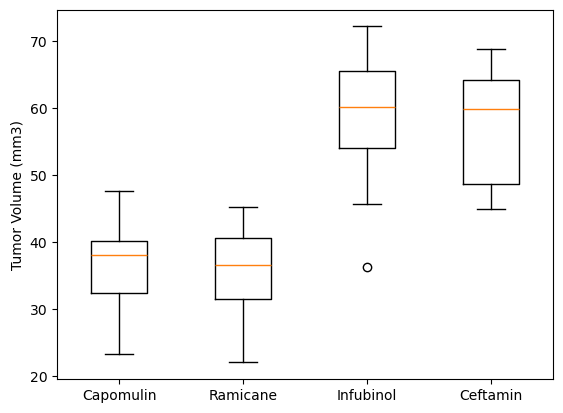

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Tumor Volume (mm3)')

plt.boxplot(tumor_volumes,labels=promisingtreatments)

plt.show()




## Line and Scatter Plots

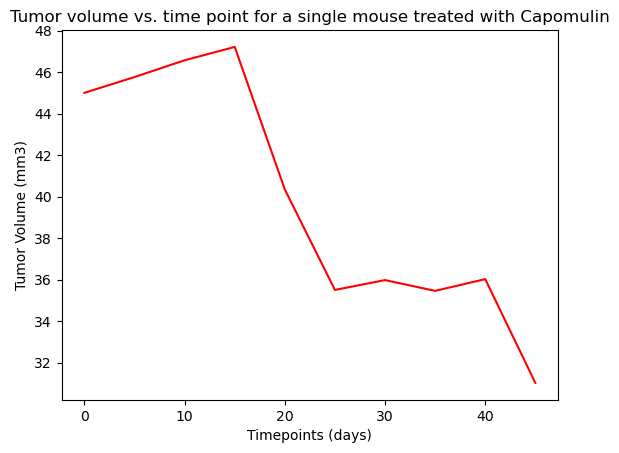

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_time_points = cleanresults[cleanresults['Drug Regimen'] == "Capomulin"]

single_mouse = "u364"

capomulin_single_mouse = capomulin_time_points[capomulin_time_points["Mouse ID"] == single_mouse]

plt.plot(capomulin_single_mouse['Timepoint'], capomulin_single_mouse['Tumor Volume (mm3)'], color='r')
plt.title("Tumor volume vs. time point for a single mouse treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoints (days)")

plt.show()

C:\Users\amyadmin\AppData\Local\Temp\ipykernel_38736\3060044011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capomulin_weights["average tumor volume"] = capomulin_weights.groupby('Weight (g)')["Tumor Volume (mm3)"].transform('mean')


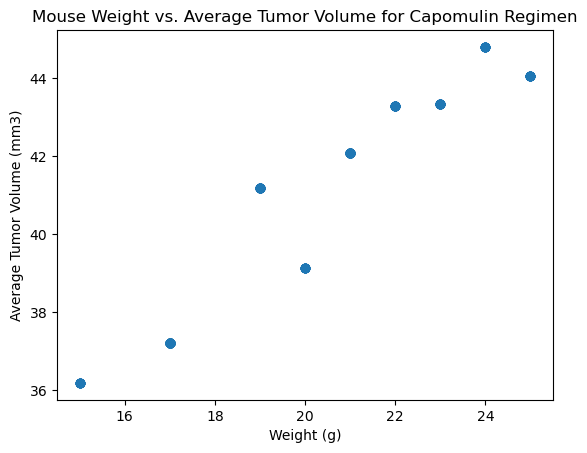

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_weights = cleanresults.loc[cleanresults['Drug Regimen'] == "Capomulin"]

capomulin_weights["average tumor volume"] = capomulin_weights.groupby('Weight (g)')["Tumor Volume (mm3)"].transform('mean')

weights = capomulin_weights["Weight (g)"]
averagetumor = capomulin_weights["average tumor volume"]

plt.scatter(weights, averagetumor)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()



## Correlation and Regression

The correlation between both variables is 0.953


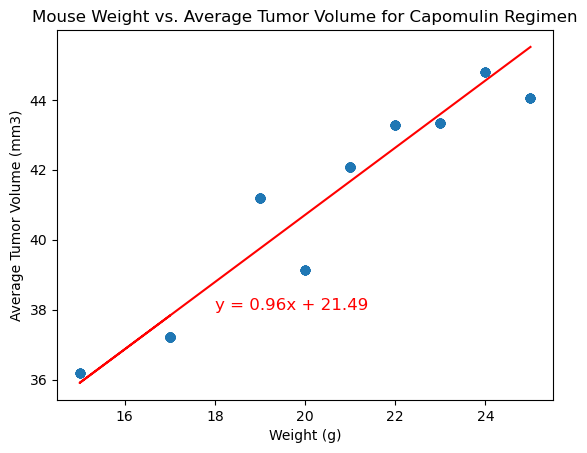

y = 0.96x + 21.49


In [23]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(weights,averagetumor)

correlation
print(f"The correlation between both variables is {round(correlation[0],3)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, averagetumor)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weights, averagetumor)
plt.plot(weights,regress_values,"r-")


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.annotate(line_eq,(18,38),fontsize=12,color="red")

plt.show()
print(line_eq)